# Olympics Performance in CHINA for Goomba

![Olympic logos](./chinalogo.jpg)

<br>
<br>

## 1.  Import library

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import re
%config InlineBackend.figure_formats = {'png', 'retina'}


# Matplotlib for Japanese and Jupyter notebook inline 
font = {"family":"Noto Sans CJK JP"}
matplotlib.rc('font', **font)
%matplotlib inline
sns.set(font=["Noto Sans CJK JP"])

## 2. Import DataFrame

In [2]:
df = pd.read_pickle('./data/processed/df.pkl')


## 3. Extract China & Summer Olympic Data

- NOC = CHN

In [3]:
df_china = df.query('Season == "Summer" & NOC == "CHN" ')

In [4]:
df_china.reset_index(drop = True , inplace = True)

In [5]:
tmp_dammies = pd.get_dummies(df_china['Medal'],columns='Medal',prefix='Medal')

In [6]:
df_china = pd.concat([df_china,tmp_dammies],axis=1)

In [7]:
sex_d = pd.get_dummies(df_china['Sex'],columns='Sex',prefix='Sex')


In [8]:
df_china = pd.concat([df_china,sex_d],axis=1)

In [9]:
for i ,sport,event in zip(df_china.index,df_china['Sport'],df_china['Event']):
    pattern = df_china.loc[i,'Sport']
    string = df_china.loc[i,'Event']
    m =re.match(pattern=pattern,string=string)
    if m:
        df_china.loc[i,'Event'] = re.sub(pattern=pattern,string=string,repl="",count=1)
    else:
        print('nomatch')

In [10]:
df_china = df_china.astype({'Age': 'int', 'Height': 'int','Weight':'int'})

In [11]:
df_china['MedalSum'] = df_china['Medal_Silver'] + df_china['Medal_Bronze'] + df_china['Medal_Gold']



## 4. Analysis
## 4-1. Sport & Event

### 4-1-1. Medals Per Year


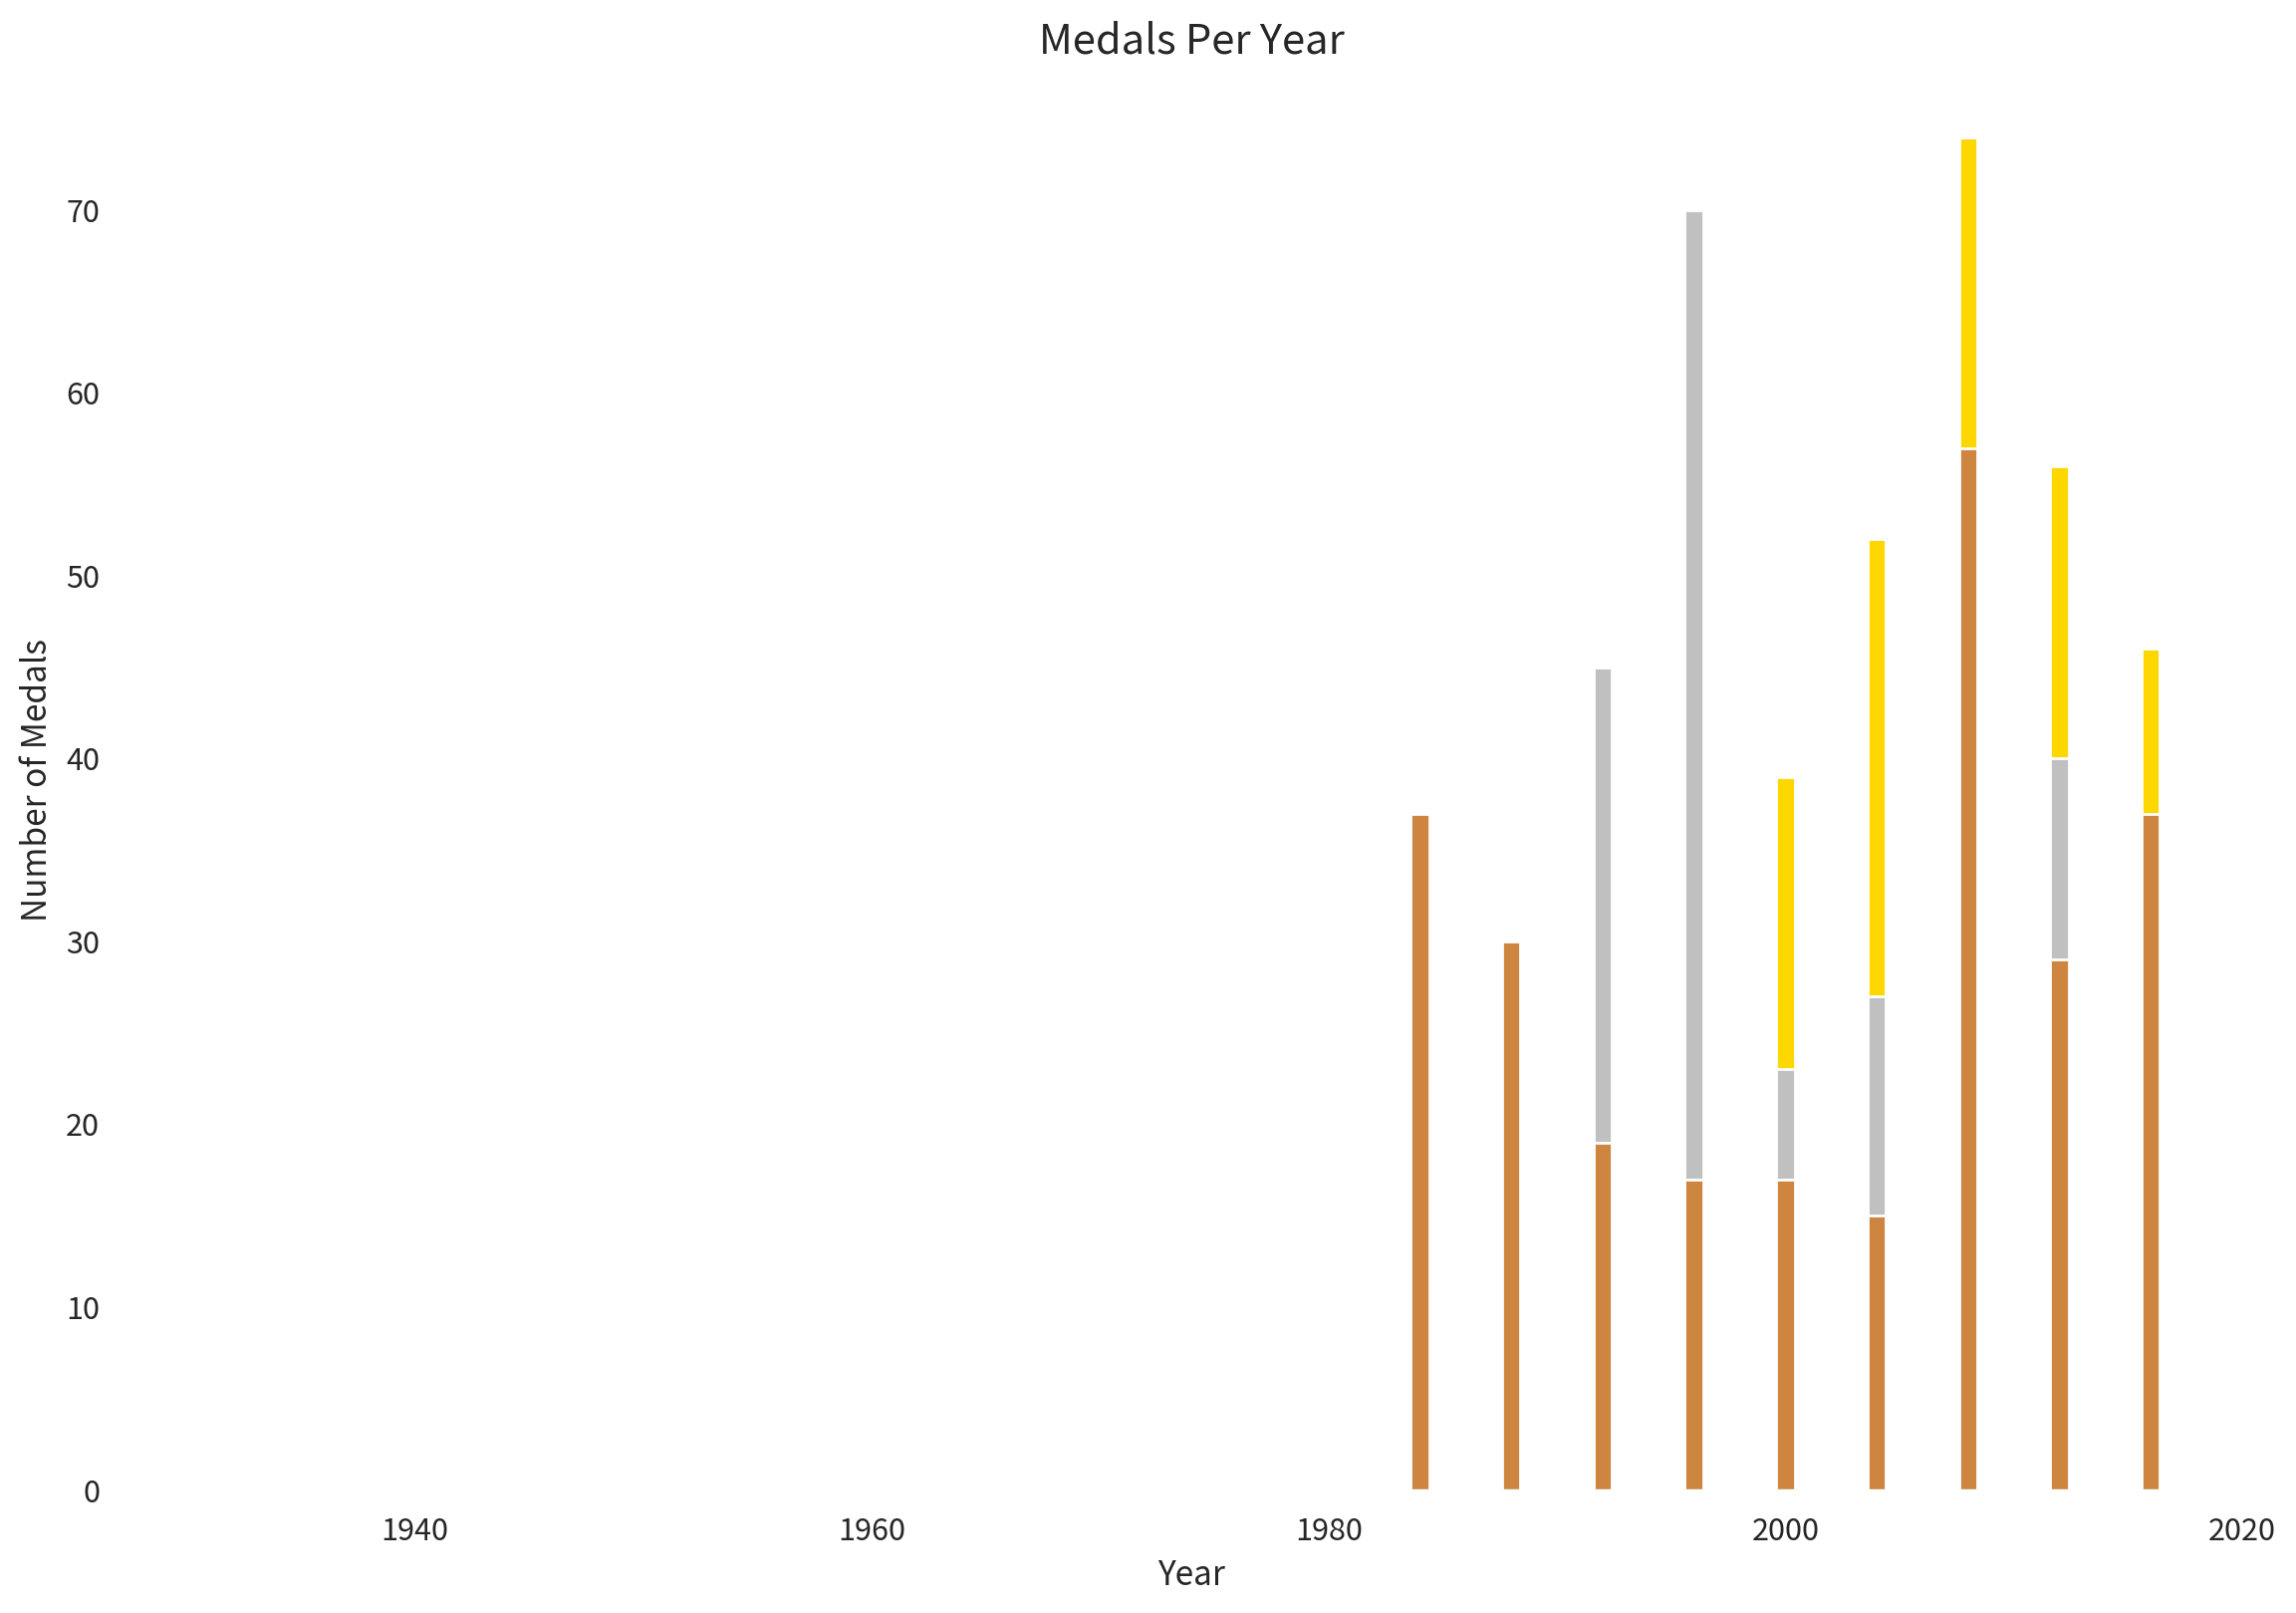

In [12]:
# 1. データ準備
df_medals = df_china.groupby('Year').sum()
x =  df_medals.index
yg = df_medals['Medal_Gold']
ys = df_medals['Medal_Silver']
yb = df_medals['Medal_Bronze']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white") #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.bar(x,yg,color='gold') 
ax.bar(x,ys,color='silver')
ax.bar(x,yb,color='peru')
# 5. グラフタイトルと軸の調整
ax.set_title('Medals Per Year',fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Medals')
ax.set_facecolor((1,1,1,0))


fig.tight_layout()
plt.show()



### 4-1-2. Player Per Year




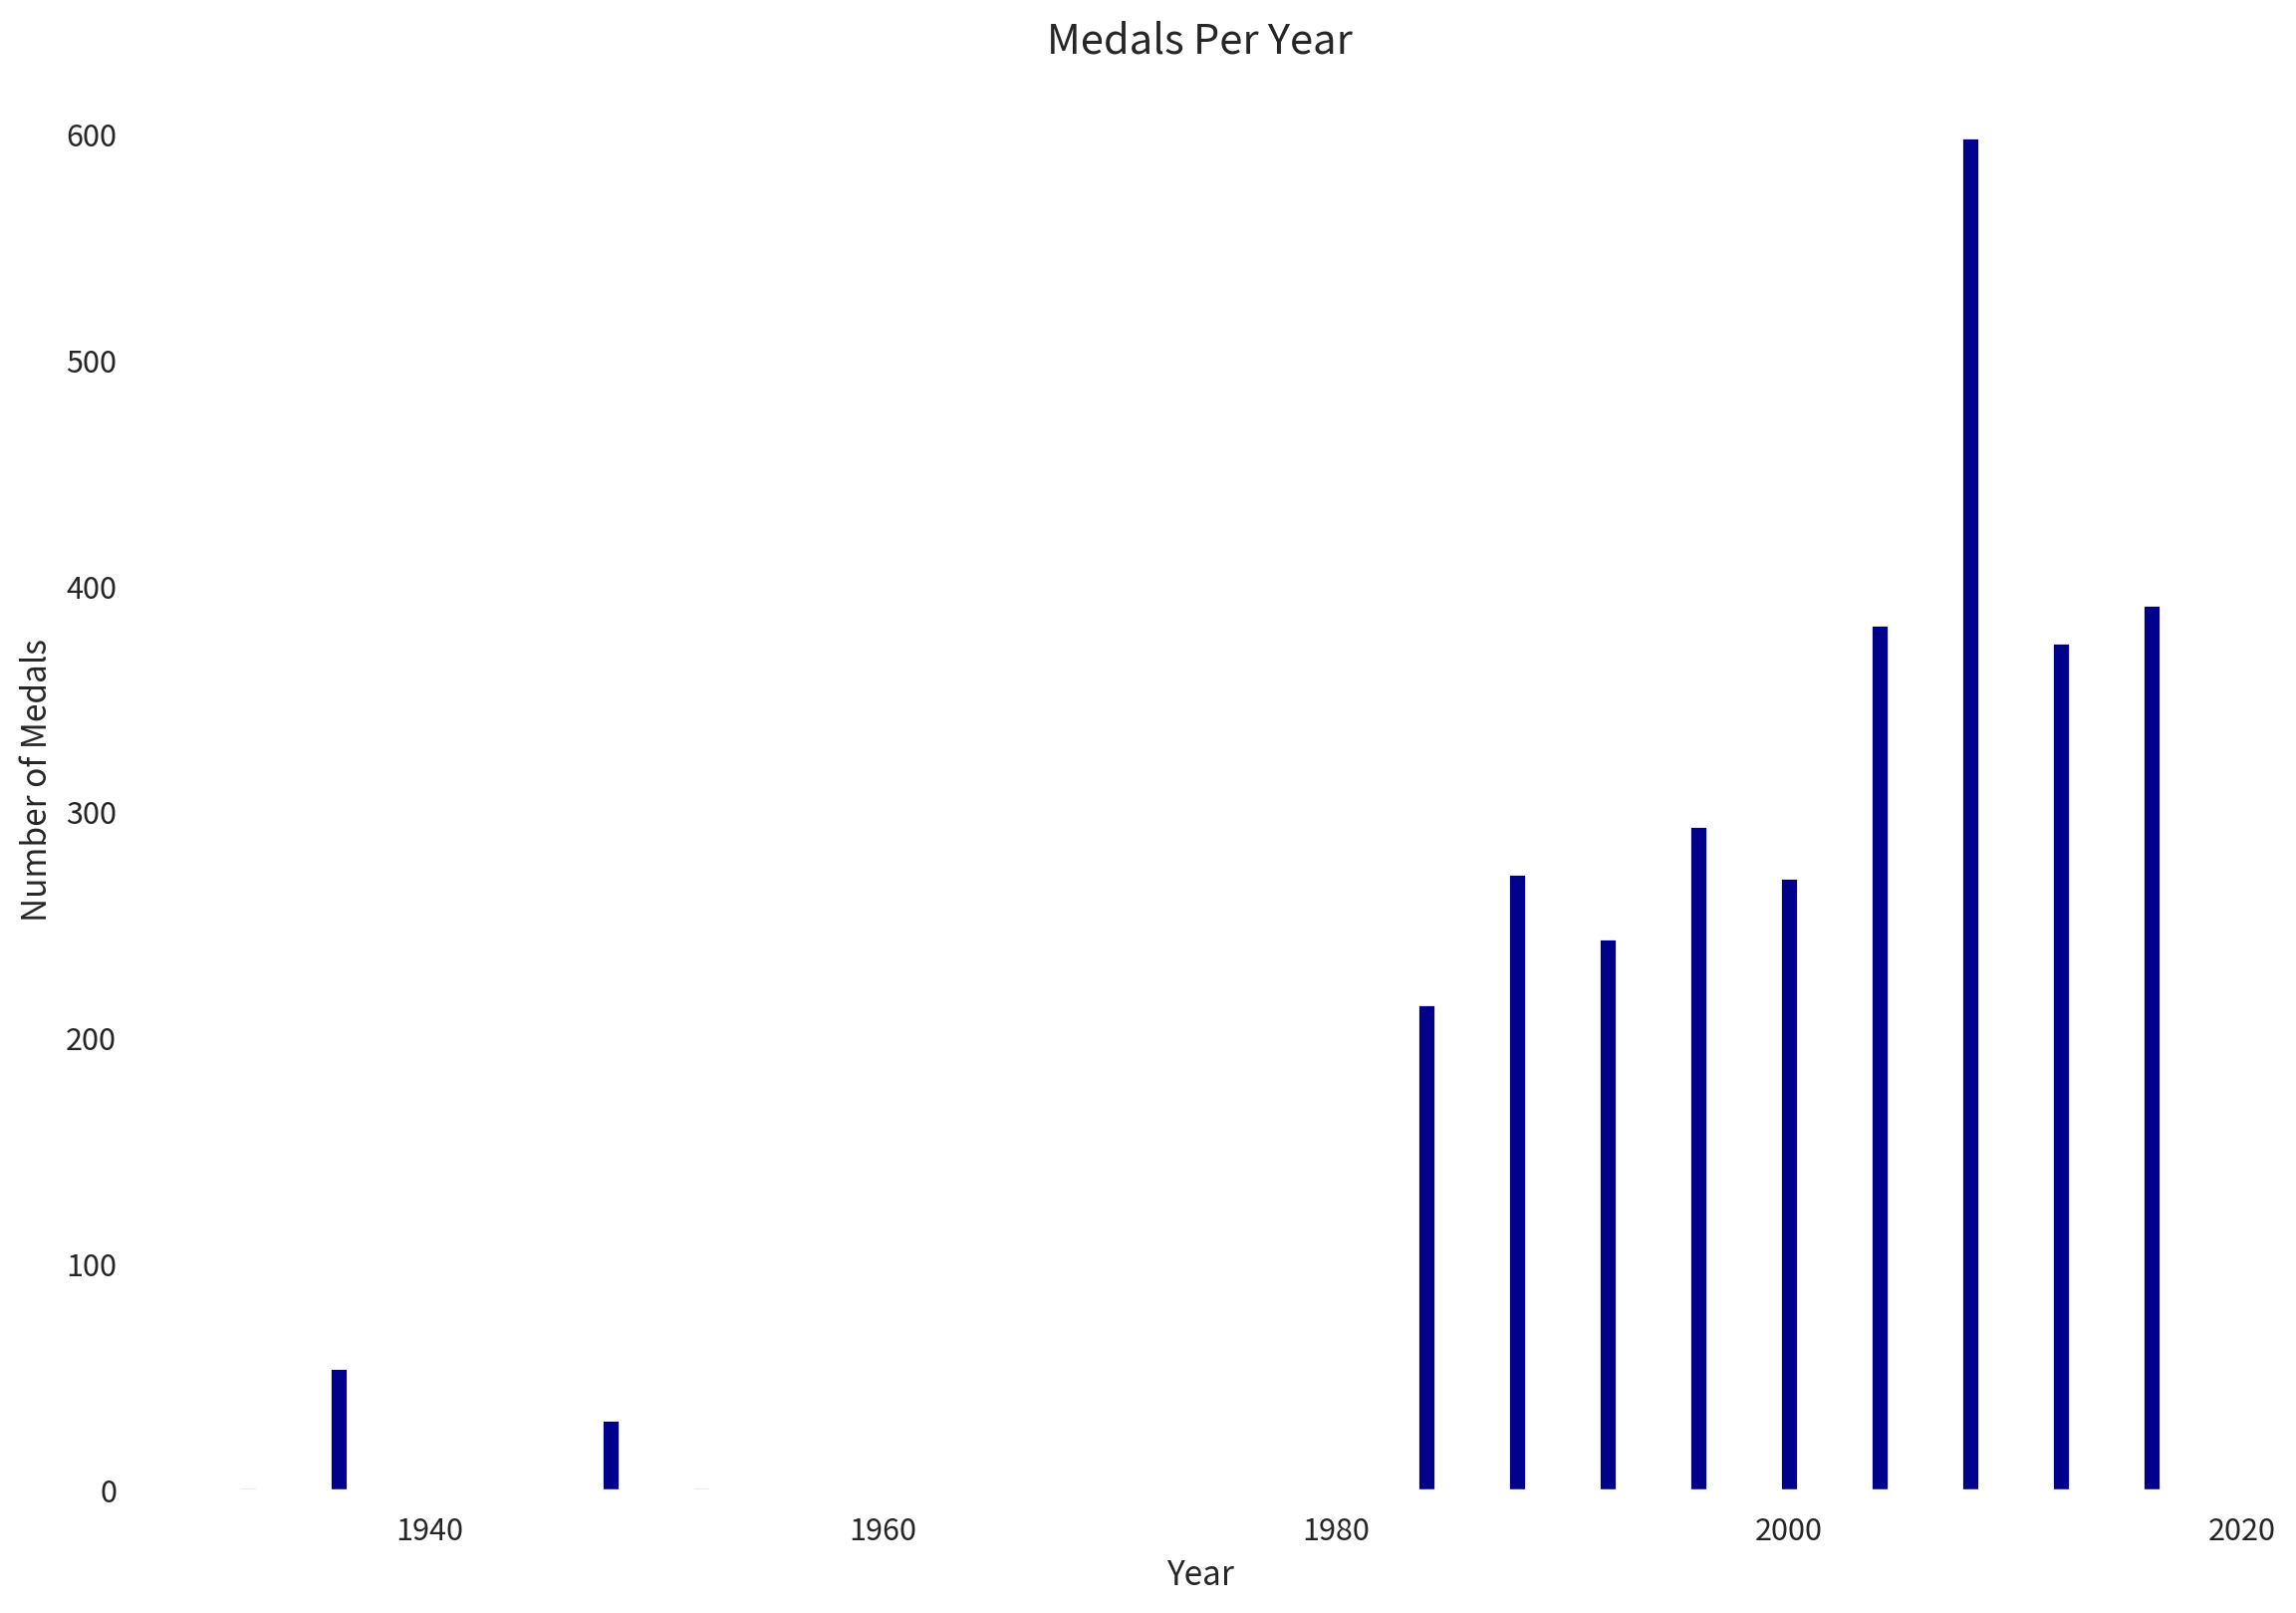

In [13]:
# 1. データ準備
df_player = df_china.groupby('Year').nunique()
x =  df_player.index
y = df_player['ID']


# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white") #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.bar(x,y,color='darkblue') 
# 5. グラフタイトルと軸の調整
ax.set_title('Medals Per Year',fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Medals')
ax.set_facecolor((1,1,1,0))


fig.tight_layout()
plt.show()

### 4-1-3. Woman to Man Ratio over the Years



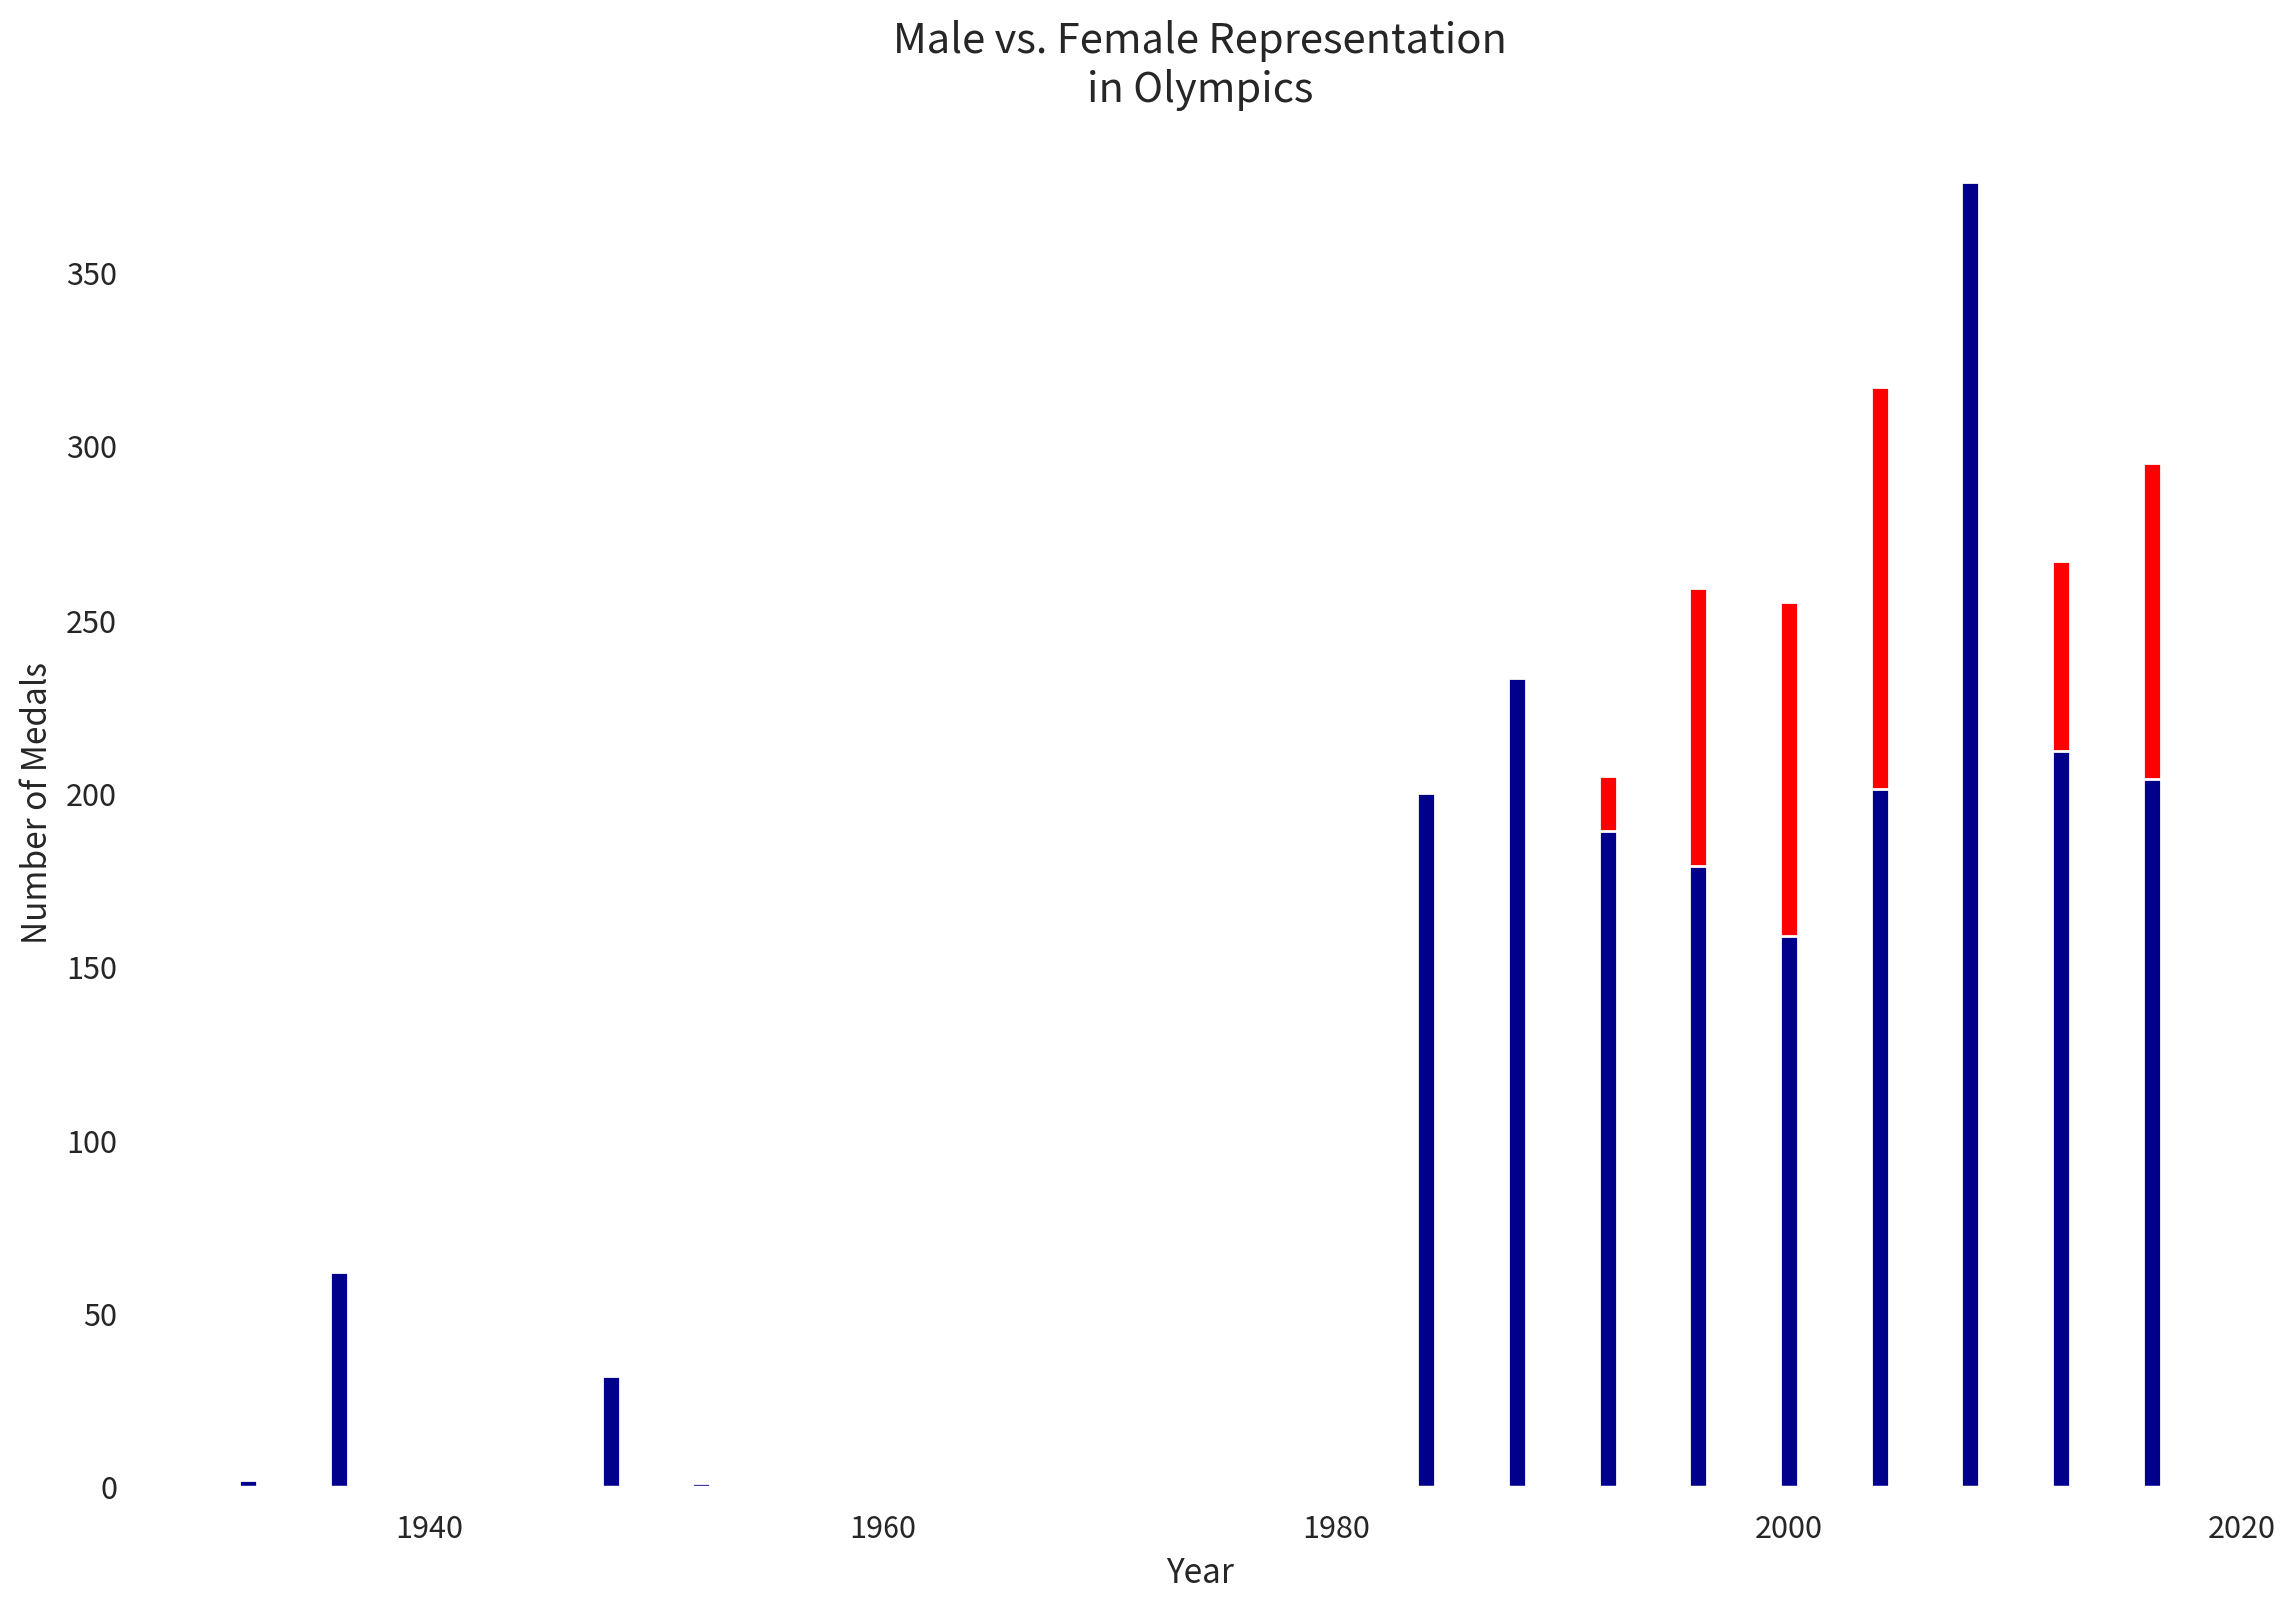

In [14]:
# 1. データ準備
df_gender = df_china.groupby('Year').sum()
x =  df_gender.index
yf = df_gender['Sex_F']
ym = df_gender['Sex_M']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white") #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.bar(x,yf,color='red') 
ax.bar(x,ym,color='darkblue')
# 5. グラフタイトルと軸の調整
ax.set_title('Male vs. Female Representation\nin Olympics',fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Medals')
ax.set_facecolor((1,1,1,0))


fig.tight_layout()
plt.show()

### 4-1-4. Medals per Sport over the Years



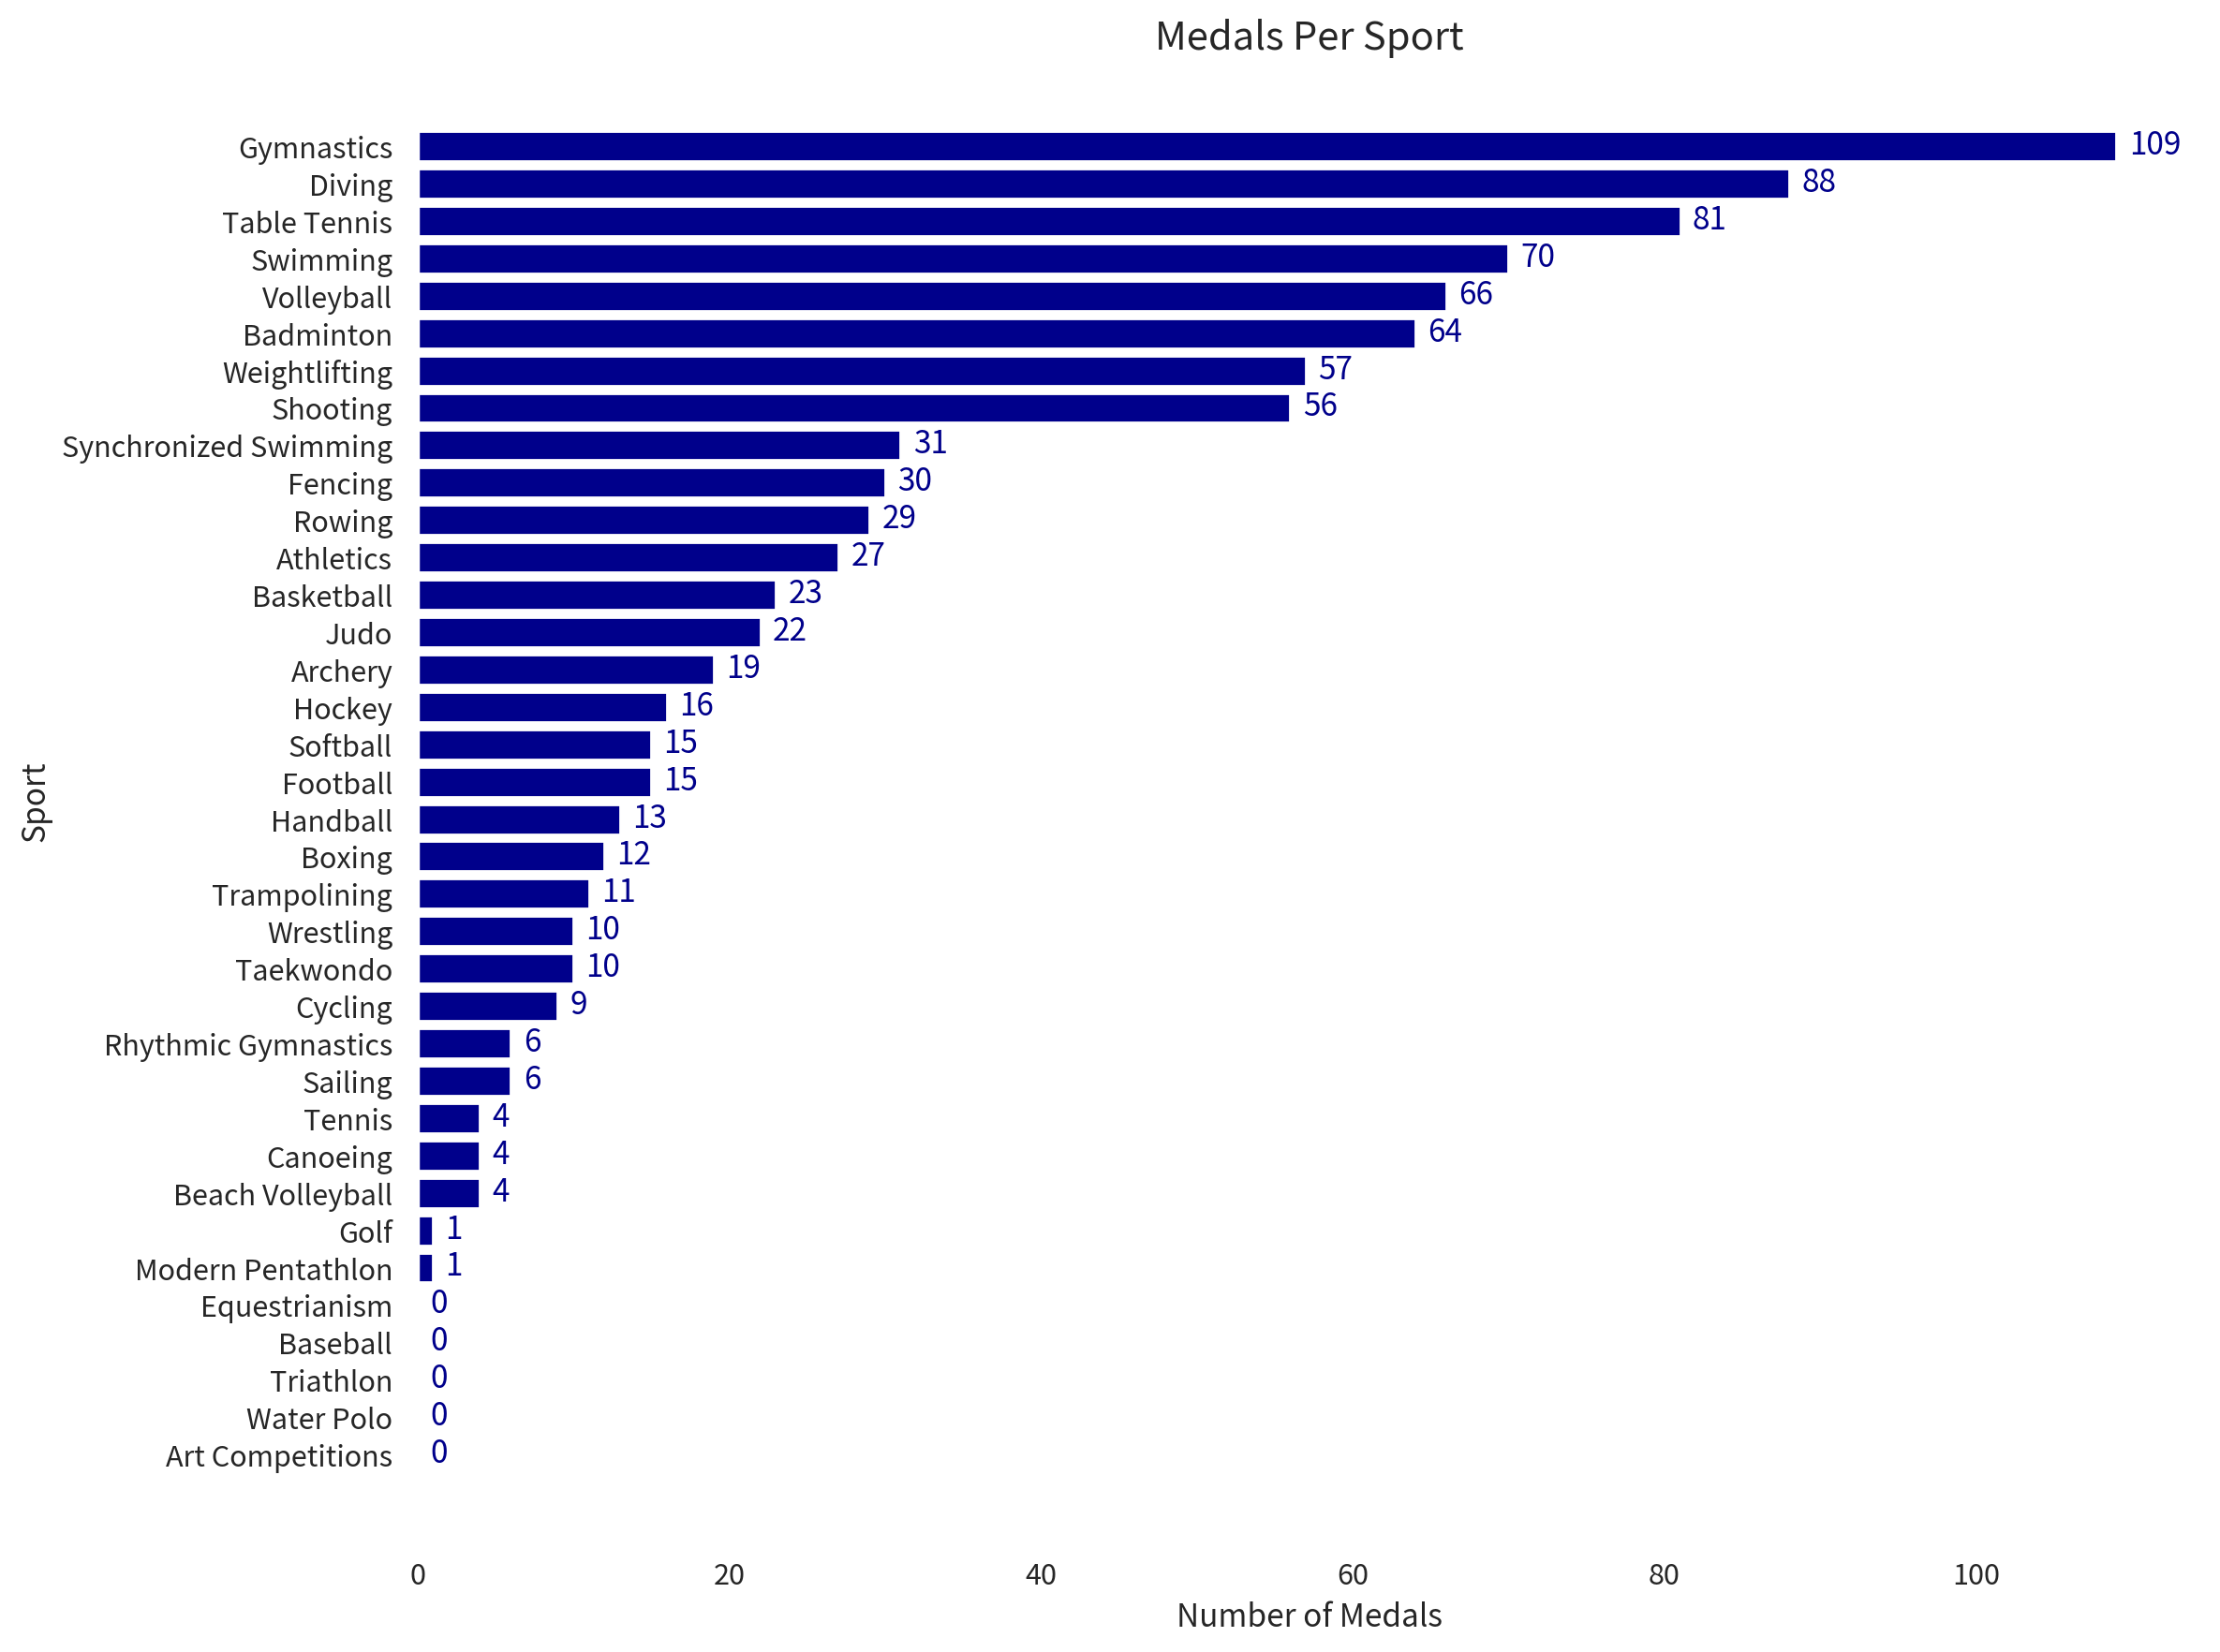

In [15]:
# 1. データ準備
df_sport = df_china.groupby('Sport').sum()
df_sport = df_sport.sort_values('MedalSum')
x =  df_sport.index
ysum = df_sport['MedalSum']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(12,9),dpi=100,facecolor="white", edgecolor="white") #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,ysum,color='darkblue') 
# 5. グラフタイトルと軸の調整
ax.set_title('Medals Per Sport',fontsize=15)
ax.set_xlabel('Number of Medals')
ax.set_ylabel('Sport')
ax.set_facecolor((1,1,1,0))

for i, value in enumerate(df_sport['MedalSum']):
    ax.text(value+0.8,i-0.2,f'{value:,.0f}',color='darkblue',fontsize=12)

fig.tight_layout()
plt.show()

### 4-1-5. Medals per Sport over the Years



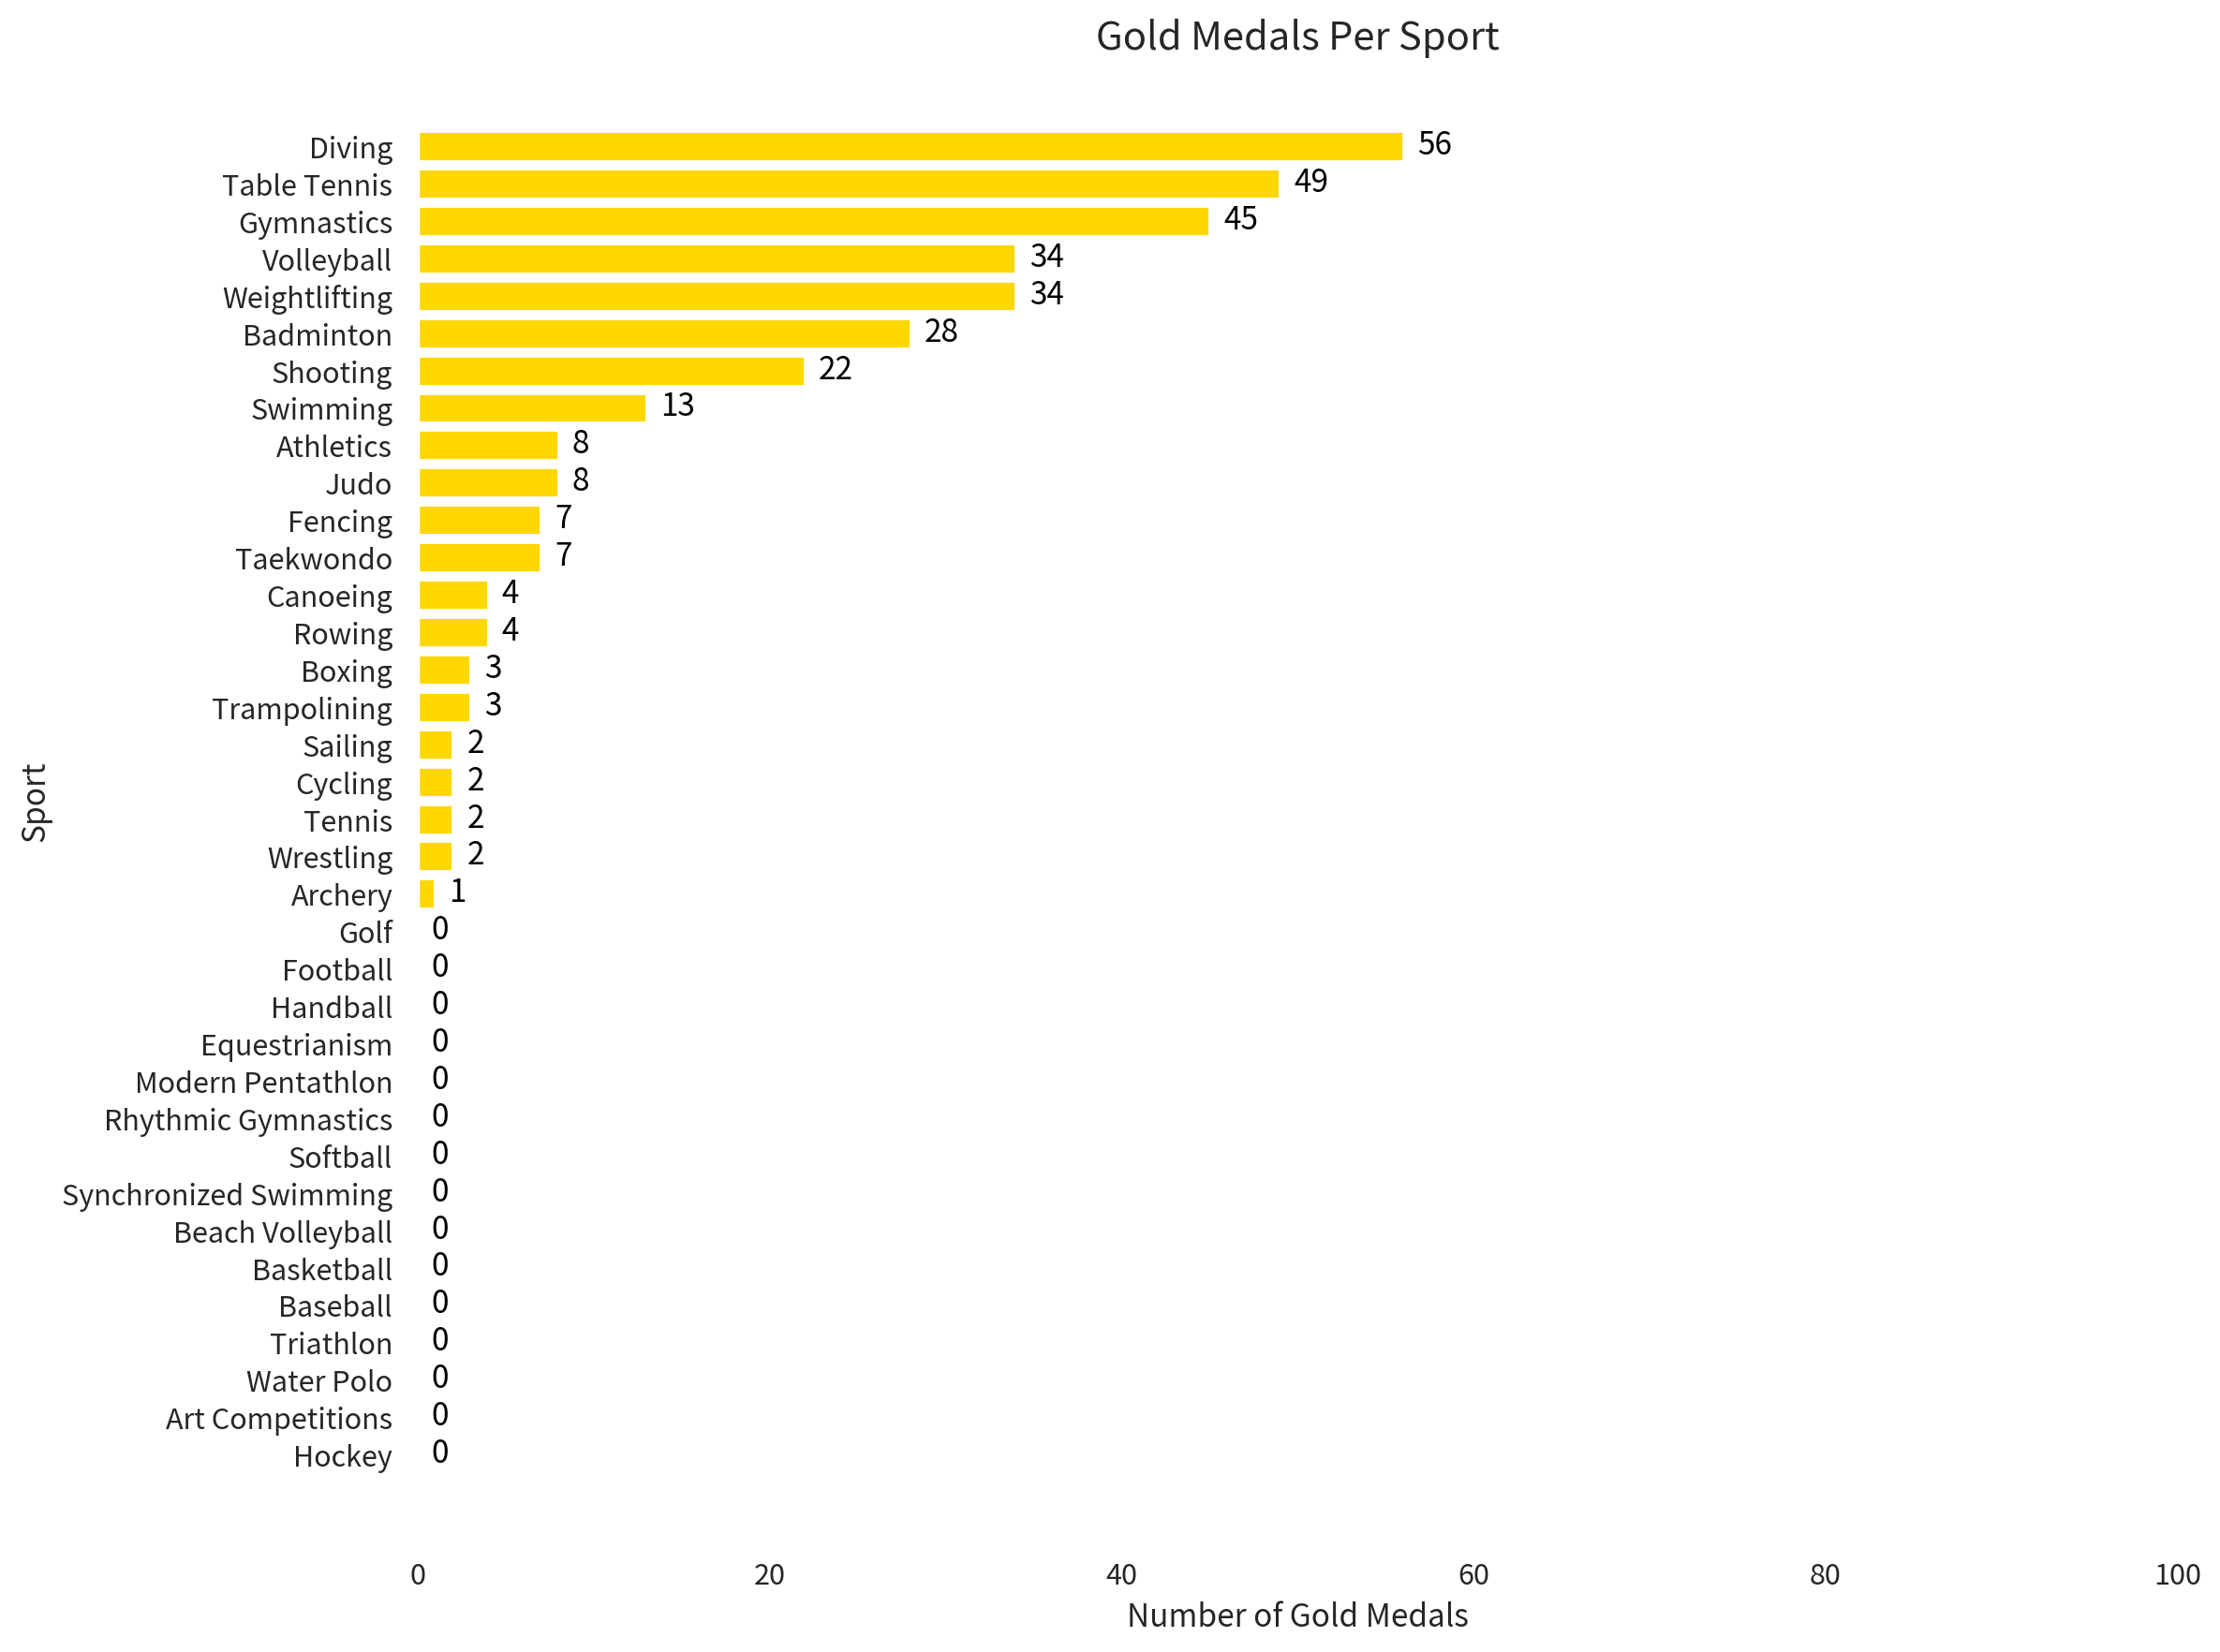

In [16]:
# 1. データ準備
df_sport = df_china.groupby('Sport').sum()
df_sport = df_sport.sort_values('Medal_Gold')
x =  df_sport.index
yg = df_sport['Medal_Gold']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(12,9),dpi=100,facecolor="white", edgecolor="white") #A4 size

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,yg,color='gold') 
# 5. グラフタイトルと軸の調整
ax.set_title('Gold Medals Per Sport',fontsize=15)
ax.set_xlabel('Number of Gold Medals')
ax.set_ylabel('Sport')
ax.set_facecolor((1,1,1,0))
ax.set_xlim(0,100)

for i, value in enumerate(df_sport['Medal_Gold']):
    ax.text(value+0.8,i-0.2,f'{value:,.0f}',color='black',fontsize=12)

fig.tight_layout()
plt.show()

### 4-1-6. Disciplines with the greatest number of  Medals


In [17]:
df_china.groupby(['Sport','Event']).sum().sort_values\
('MedalSum',ascending=False)[['MedalSum','Medal_Gold','Medal_Silver','Medal_Bronze']].head(20)

MedalSum  Medal_Gold  \
Sport                 Event                                            
Volleyball             Women's Volleyball             66          34   
Gymnastics             Men's Team All-Around          41          17   
Synchronized Swimming  Women's Team                   27           0   
Badminton              Women's Doubles                24          10   
Basketball             Women's Basketball             23           0   
Table Tennis           Women's Doubles                18           8   
                       Women's Singles                17           8   
Gymnastics             Women's Team All-Around        17           6   
Hockey                 Women's Hockey                 16           0   
Softball               Women's Softball               15           0   
Football               Women's Football               15           0   
Diving                 Women's Springboard            14           8   
Table Tennis           Men's Singles                  14           5   
                       Men's Doubles                  14          10   
Badminton              Mixed Doubles                  14           6   
Handball               Women's Handball               13           0   
Weightlifting          Men's Bantamweight             13           4   
Diving                 Men's Springboard              13           5   
                       Men's Platform                 12           4   
Archery                Women's Team                   12           0   

                                                Medal_Silver  Medal_Bronze  
Sport                 Event                                                 
Volleyball             Women's Volleyball                  9            23  
Gymnastics             Men's Team All-Around              19             5  
Synchronized Swimming  Women's Team                       18             9  
Badminton              Women's Doubles                     6             8  
Basketball             Women's Basketball                 11            12  
Table Tennis           Women's Doubles                     8             2  
                       Women's Singles                     6             3  
Gymnastics             Women's Team All-Around             0            11  
Hockey                 Women's Hockey                     16             0  
Softball               Women's Softball                   15             0  
Football               Women's Football                   15             0  
Diving                 Women's Springboard                 5             1  
Table Tennis           Men's Singles                       5             4  
                       Men's Doubles                       4             0  
Badminton              Mixed Doubles                       2             6  
Handball               Women's Handball                    0            13  
Weightlifting          Men's Bantamweight                  6             3  
Diving                 Men's Springboard                   5             3  
                       Men's Platform                      4             4  
Archery                Women's Team                       12             0

## 4-2. Athletes



In [119]:
s = df_china.groupby(['ID','Name']).sum()

In [120]:
s1 = s[s['MedalSum']>=5][['Medal_Bronze','Medal_Gold','Medal_No Medal','Medal_Silver','MedalSum']].reset_index()

In [121]:
sex = []
sport = []
for i in s1['Name']:
    sex.append(df_china.query('Name == @i').iat[0,2])
    sport.append(df_china.query('Name == @i').iat[0,11])
s1['Sex'],s1['Sport'] = sex,sport

In [164]:
s1 = s1.sort_values('MedalSum',ascending=False)

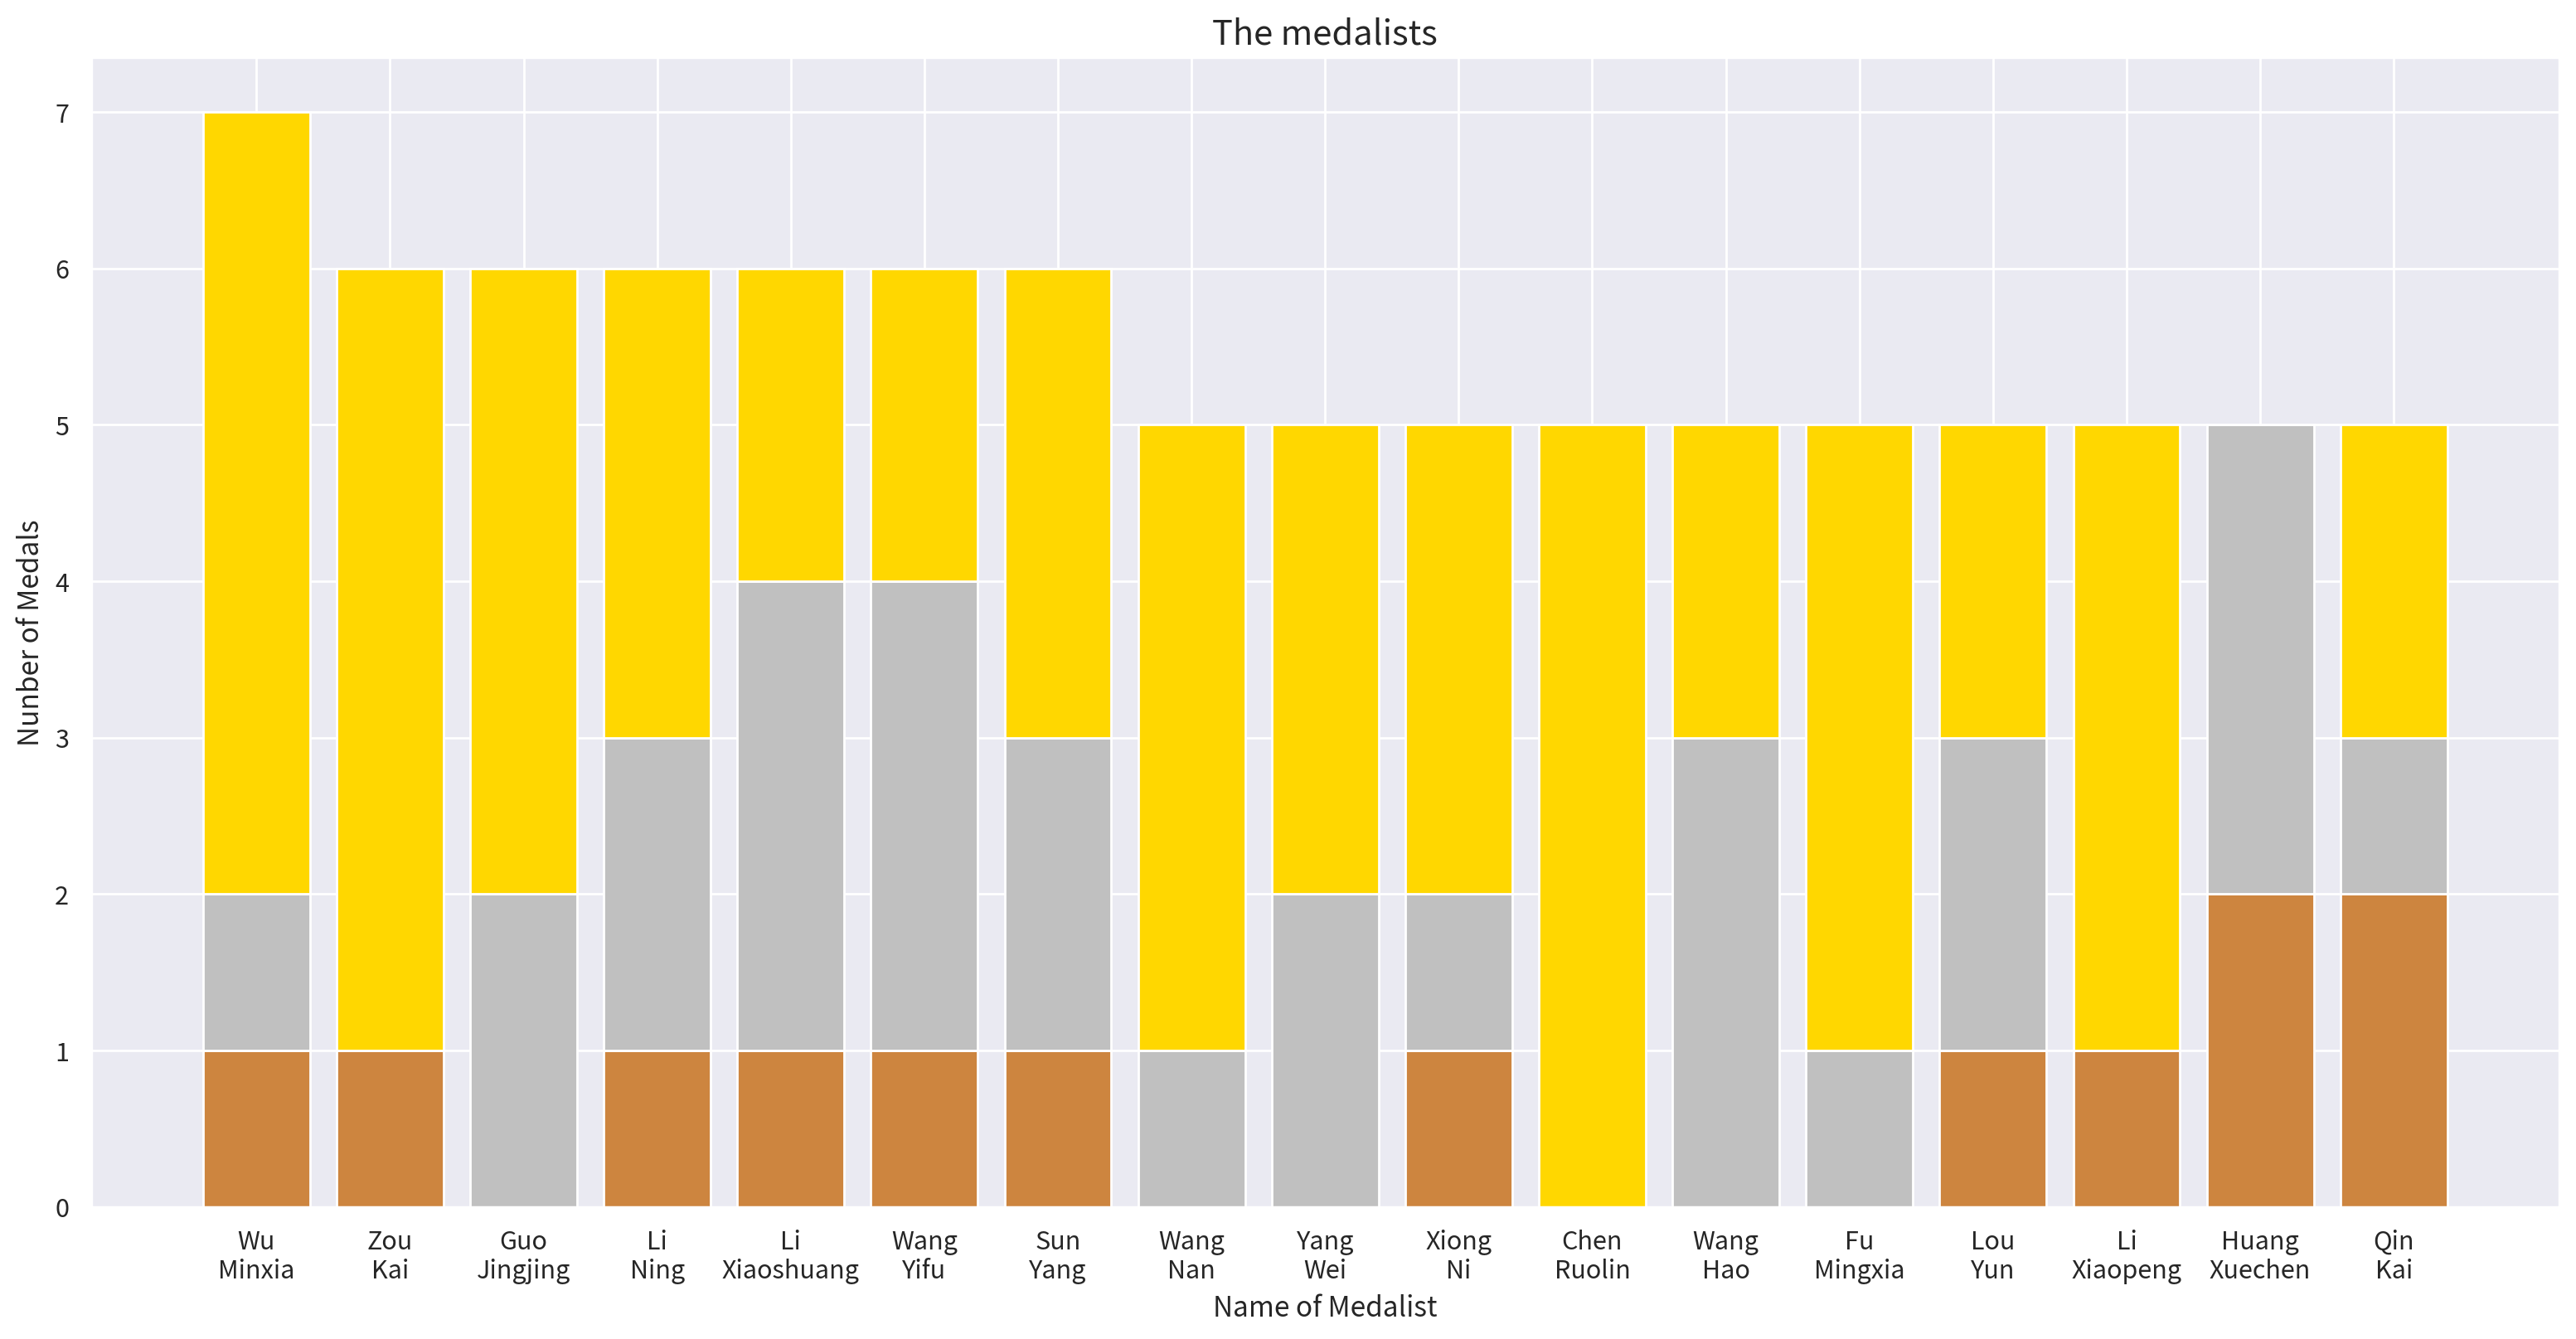

In [167]:
# 1. データの準備
name_list = []
for i in s1['Name']:
    s = i.split()
    name_list.append(s[0]+"\n"+s[1])
s1['Name_2'] = name_list


# 2. Figureインスタンス生成 


fig = plt.figure(figsize=(15.69,8.27),dpi=100,facecolor="white", edgecolor="white") #A4 size
x = s1['Name_2']
y1 = s1['Medal_Bronze']
y2 = s1['Medal_Silver']
y3 = s1['Medal_Gold']
# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

ax.bar(x,y1,color='peru') 
ax.bar(x,y2,color='silver',bottom=y1)
ax.bar(x,y3,color='gold',bottom=y1+y2)

ax.set_title('The medalists',fontsize=15)
ax.set_ylabel('Nunber of Medals')
ax.set_xlabel('Name of Medalist')

fig.tight_layout()
plt.show()

In [166]:
s1

,ID,Name,Medal_Bronze,Medal_Gold,Medal_No Medal,Medal_Silver,MedalSum,Sex,Sport,Name_2
13,131805,Wu Minxia,1,5,0,1,7,F,Diving,Wu\nMinxia
16,135269,Zou Kai,1,5,2,0,6,M,Gymnastics,Zou\nKai
2,43965,Guo Jingjing,0,4,1,2,6,F,Diving,Guo\nJingjing
4,69459,Li Ning,1,3,10,2,6,M,Gymnastics,Li\nNing
6,69529,Li Xiaoshuang,1,2,10,3,6,M,Gymnastics,Li\nXiaoshuang
12,128626,Wang Yifu,1,2,4,3,6,M,Shooting,Wang\nYifu
9,116505,Sun Yang,1,3,4,2,6,M,Swimming,Sun\nYang
11,128539,Wang Nan,0,4,1,1,5,M,Judo,Wang\nNan
15,132547,Yang Wei,0,3,18,2,5,F,Badminton,Yang\nWei
14,132045,Xiong Ni,1,3,0,1,5,M,Diving,Xiong\nNi
